### Author: Mohamed Ismail Amer
### Domain: Computer Vision and Internet of things
### Task 1: Object Detection

In [1]:
!pip install opencv-python

In [2]:
# import the necessary packages
import cv2
import matplotlib.pyplot as plt

In [3]:
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

In [4]:
net = cv2.dnn_DetectionModel(weightsPath, configPath)

In [5]:
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 00000191F5969F30>

In [6]:
classNames = []
fileName = 'coco.names'
with open(fileName, 'rt') as f:
  classNames = f.read().rstrip('\n').split('\n')

In [7]:
print(classNames)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [8]:
print(len(classNames))

91


In [9]:
img = cv2.imread('elon.jpg')

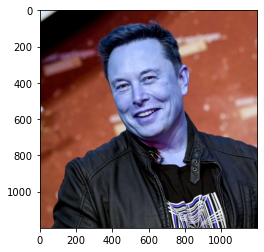

In [10]:
plt.imshow(img) #BGR

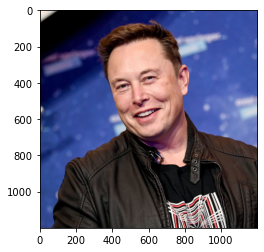

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
classIdx, confidence, bbox = net.detect(img, confThreshold=0.60)

In [13]:
fontSize = 3
fontFamily = cv2.FONT_HERSHEY_COMPLEX
for classId, conf, box in zip(classIdx.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, box, (255, 0, 0), 2)
    cv2.putText(img,classNames[classId-1],(box[0]+10,box[1]+40),
            fontFamily,fontSize,(0,255,0),3)

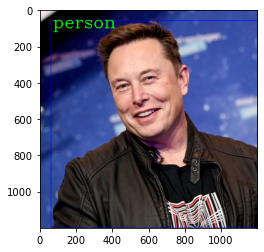

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
img = cv2.imread('Man_Car.jpeg')

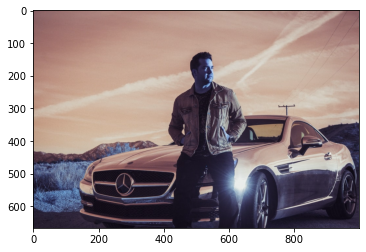

In [16]:
plt.imshow(img) #BGR

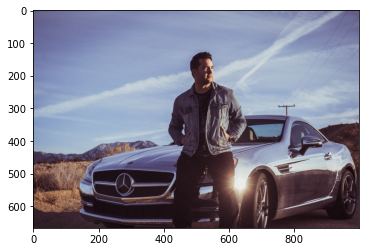

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
classIdx, confidence, bbox = net.detect(img, confThreshold=0.50)

In [19]:
print(classIdx)
print(confidence)
print(bbox)

[1 3]
[0.7962084 0.5984135]
[[409  97 231 570]
 [155 293 839 363]]


In [20]:
fontSize = 3
fontFamily = cv2.FONT_HERSHEY_COMPLEX
for classId, conf, box in zip(classIdx.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, box, (255, 0, 0), 2)
    cv2.putText(img,classNames[classId-1],(box[0]+10,box[1]+40),
            fontFamily,fontSize,(0,255,0),3)

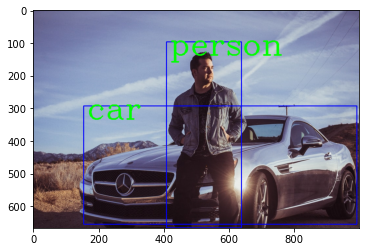

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Object detection on videos

In [23]:
cap = cv2.VideoCapture('traffic-mini.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("can't open the video")

In [24]:
fontSize = 3
fontFamily = cv2.FONT_HERSHEY_COMPLEX

In [25]:
while True:
    ret, frame = cap.read()
    classIdx, confidence, bbox = net.detect(frame, confThreshold=0.60)
    print(classIdx)
    
    if len(classIdx)!=0:
        for classId, conf, box in zip(classIdx.flatten(), confidence.flatten(), bbox):
            if(classId<=80):
                cv2.rectangle(frame, box, (255, 0, 0), 2)
                cv2.putText(frame, classNames[classId-1],(box[0]+10,box[1]+40),
                            fontFamily,fontSize,(0,255,0),3)
    cv2.imshow('Object Detection for video', frame)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break
      
cv2.release()
cv2.destoryAllwindows()

[6 6 6 3]
[6 6 6 3]
[6 6 6 3]
[6 6 6 3]
[6 6 6 3]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6 6]
[6 6 6 6]
[6 6 6]
[6 6 6]
[6 6 6 3]
[6 6 6]
[6 6 6 6]
[6 6 6 3]
[6 6 6 1]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6 6 6]
[6 6]
[6 6 3]
[6 6 3]
[6 6 3]
[6 6 3]
[6 6 3 6]
[6 6 3]
[6 6 3 6]
[6 6 3 6]
[6 6 6 3]
[6 6 6 3]
[6 6 6 3]
[6 6 3 6]
[6 6 3 6]
[6 6 3 6 6]
[6 6 6 3]
[6 6 3]
[6 6 3]
[6 6 3]
[6 6 3 6]
[6 6 3 6]
[6 6 3]
[6 6 3 6]
[6 6 3]
[6 6 3]
[6 6 3]
[6 6 3]
[6 3 6]
[6 6 3]
[6 3 6]
[6 3 6]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3 6]
[6 3 6]
[6 3]
[6 3 6]
[6 3 6]
[6 3 6 3]
[6 3 3]
[6 3 6 3 6]
[6 3 6 3 6]
[6 3 6 6 3]
[6 3 6 3 6]
[6 3 6 3]
[6 3 3 6]
[6 3 3]
[6 3 3]
[6 3 3 6]
[6 3]
[6 6 3]
[6 3]
[6 3 6 6]
[6 3 6 6]
[6 3 6]
[6 3 6 6 1]
[6 3]
[6 3 6 1 6]


AttributeError: module 'cv2' has no attribute 'release'

## Real-Time Object detection 

In [22]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("can't open the the WebCam")

In [23]:
fontSize = 3
fontFamily = cv2.FONT_HERSHEY_COMPLEX

In [25]:
while True:
    ret, frame = cap.read()
    classIdx, confidence, bbox = net.detect(frame, confThreshold=0.60)
    print(classIdx)
    
    if len(classIdx)!=0:
        for classId, conf, box in zip(classIdx.flatten(), confidence.flatten(), bbox):
            if(classId<=80):
                cv2.rectangle(frame, box, (255, 0, 0), 2)
                cv2.putText(frame, classNames[classId-1],(box[0]+10,box[1]+40),
                            fontFamily,fontSize,(0,255,0),3)
    cv2.imshow('Object Detection for video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
  
cv2.release()
cv2.destoryAllwindows()

[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[ 1 84 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 62]
[1]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[1]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[ 1 84]
[1]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 84]
[ 1 8

KeyboardInterrupt: 